# Import Necessary Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

import cmath
import scipy.interpolate as itp
from matplotlib.colors import LogNorm,SymLogNorm
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import pandas as pd
import time

import matplotlib.ticker as ticker
import matplotlib.patches as patches
import itertools

In [2]:
nu_c = 154.255
redshift = (1420.4/nu_c) - 1
Tbar3=((22)*np.sqrt((1+np.array(redshift))/7))**3

# Plot Figure 3

In [3]:
mabs_npz = np.load("fig3.npz",allow_pickle=True)
xx                 = mabs_npz['arr_0'] * Tbar3
mabs_final_NF      = mabs_npz['arr_1'] * Tbar3
mabs_final_stdT_NF = mabs_npz['arr_2'] * Tbar3
mabs_final_F       = mabs_npz['arr_3'] * Tbar3
mabs_final_stdT_F  = mabs_npz['arr_4'] * Tbar3
lp_xvals           = mabs_npz['arr_5'] 

In [4]:
def inset_lp(ax1,data, est_key, est_data, est_sd, text):
    ax1_inset = inset_axes(ax1, width="88%", height="40%", loc="upper center", bbox_to_anchor=(0.0,-.04, 1, 1), bbox_transform=ax1.transAxes)#bbox_to_anchor=(0.0, -.1, 1, 1)
    ax1_inset.plot( lp_xvals, data, 'k-', lw=1.3)
    ax1_inset.set_facecolor((1, 1, 1, 0.6))  
    ax1_inset.text(0.8, 0.85, r"$\Delta\nu_2=0$", transform=ax1.transAxes, fontsize=15, color="k", ha="left", va="top")
    ax1_inset.text(0.021, 0.90, text,
               transform=ax1_inset.transAxes,
               fontsize=15.6, color='navy',
               ha='left', va='top')
    
    ax1_inset.tick_params(axis='y', which='both',
                      direction='in',
                      right=False,labelsize=8 )

    ax1_inset.tick_params(axis='x', which='both',
                      direction='out',
                      top=False,labelsize=8,labelcolor='k')
    
    ax1_inset.set_ylabel(r"$B_A(\Delta\nu_1)$", fontsize=9)
    
    if est_key==1:
        ax1_inset.errorbar(lp_xvals, est_data, yerr=0, fmt='.', capsize=1, color='g', markersize=.07)
        ax1_inset.fill_between(lp_xvals, est_data - est_sd, est_data + est_sd, color='orange', alpha=1)

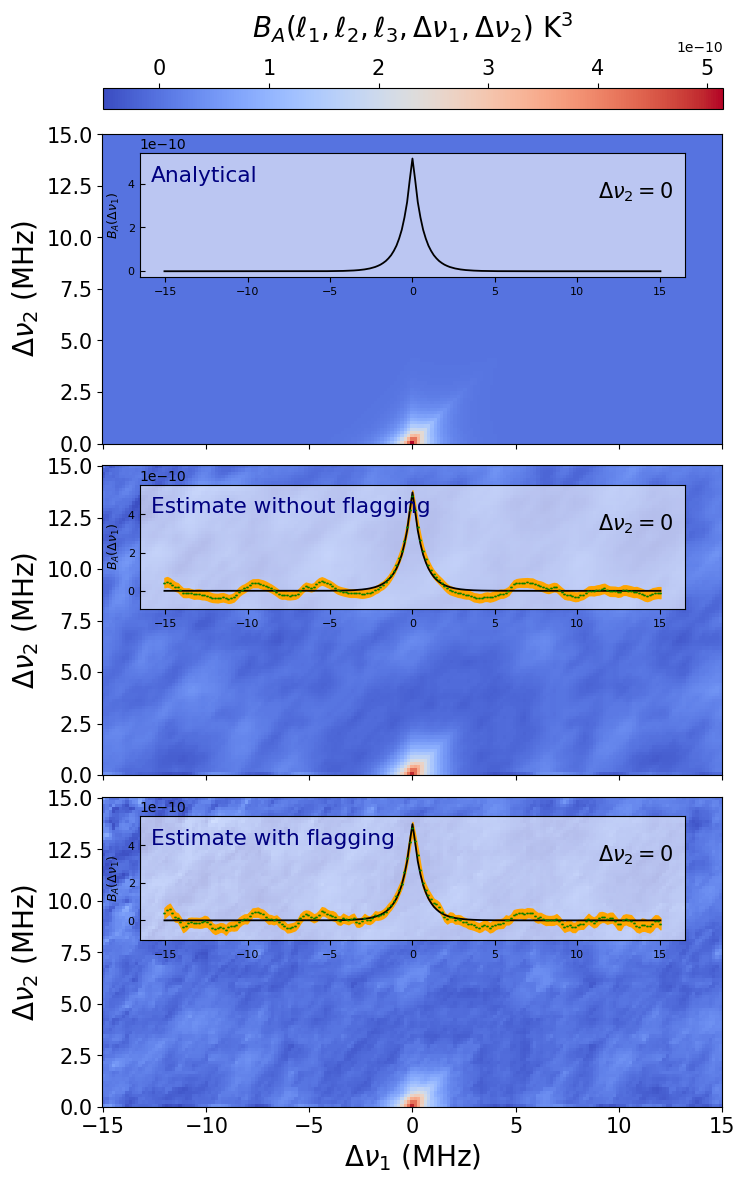

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

vmin = min(np.min(xx), np.min(mabs_final_F), np.min(mabs_final_NF))
vmax = max(np.max(xx), np.max(mabs_final_F), np.max(mabs_final_NF))
xmin = np.min(lp_xvals)
xmax = np.max(lp_xvals)
ymin =  0
ymax = np.max(lp_xvals)
cmap = 'coolwarm'
# Create a figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 14),sharex=True)

# Plot the first image with common normalization
im1 = ax1.imshow(xx, origin='lower',
                 extent=[xmin, xmax, ymin, ymax],
                 cmap=cmap, vmin=vmin, vmax=vmax)


# Plot the second image with common normalization
im2 = ax2.imshow(mabs_final_NF, origin='lower',
                 extent=[xmin, xmax, ymin, ymax],
                 cmap=cmap, vmin=vmin, vmax=vmax)


# Plot the second image with common normalization
im3 = ax3.imshow(mabs_final_F, origin='lower',
                 extent=[xmin, xmax, ymin, ymax],
                 cmap=cmap, vmin=vmin, vmax=vmax)

# Create a ScalarMappable with the common normalization and colormap
norm = colors.Normalize(vmin=vmin, vmax=vmax)
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

cbar_ax = fig.add_axes([0.1257, .86, .775, 0.015])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal',location='top')
cbar.set_label(r'$B_A(\ell_1,\ell_2,\ell_3,\Delta\nu_{1},\Delta\nu_{2})~{\rm K}^3$',fontsize=20,labelpad=15)
cbar.ax.tick_params(labelsize=15)

ax1.set_ylabel(r'$\Delta\nu_{2}$ (MHz)',fontsize=20)
ax2.set_ylabel(r'$\Delta\nu_{2}$ (MHz)',fontsize=20)
ax3.set_xlabel(r'$\Delta\nu_{1}$ (MHz)',fontsize=20)
ax3.set_ylabel(r'$\Delta\nu_{2}$ (MHz)',fontsize=20)


ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax3.tick_params(labelsize=15)

#### Lineplots ###################
ii = 0
inset_lp(ax1,xx[ii],0,0,0,"Analytical")
inset_lp(ax2,xx[ii],1,mabs_final_NF[ii],mabs_final_stdT_NF[ii], "Estimate without flagging")
inset_lp(ax3,xx[ii],1,mabs_final_F[ii],mabs_final_stdT_F[ii],"Estimate with flagging")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=-.2)
plt.draw()

# Plot Figure 4

In [6]:
cylbs_npz = np.load("fig4.npz",allow_pickle=True)
binned_datak    = cylbs_npz['arr_0'] * Tbar3 
cylbs_mean_NF   = cylbs_npz['arr_1'] * Tbar3
cylbs_stdT_NF   = cylbs_npz['arr_2'] * Tbar3
cylbs_mean_F    = cylbs_npz['arr_3'] * Tbar3
cylbs_stdT_F    = cylbs_npz['arr_4'] * Tbar3
k1ll_xvals      = cylbs_npz['arr_5'] 

In [7]:
x_centers=np.array([-1.0913798 , -0.97649772, -0.86161563, -0.74673355, -0.63185146,
       -0.51696938, -0.4020873 , -0.28720521, -0.17232313, -0.05744104,
        0.05744104,  0.17232313,  0.28720521,  0.4020873 ,  0.51696938,
        0.63185146,  0.74673355,  0.86161563,  0.97649772,  1.0913798 ])

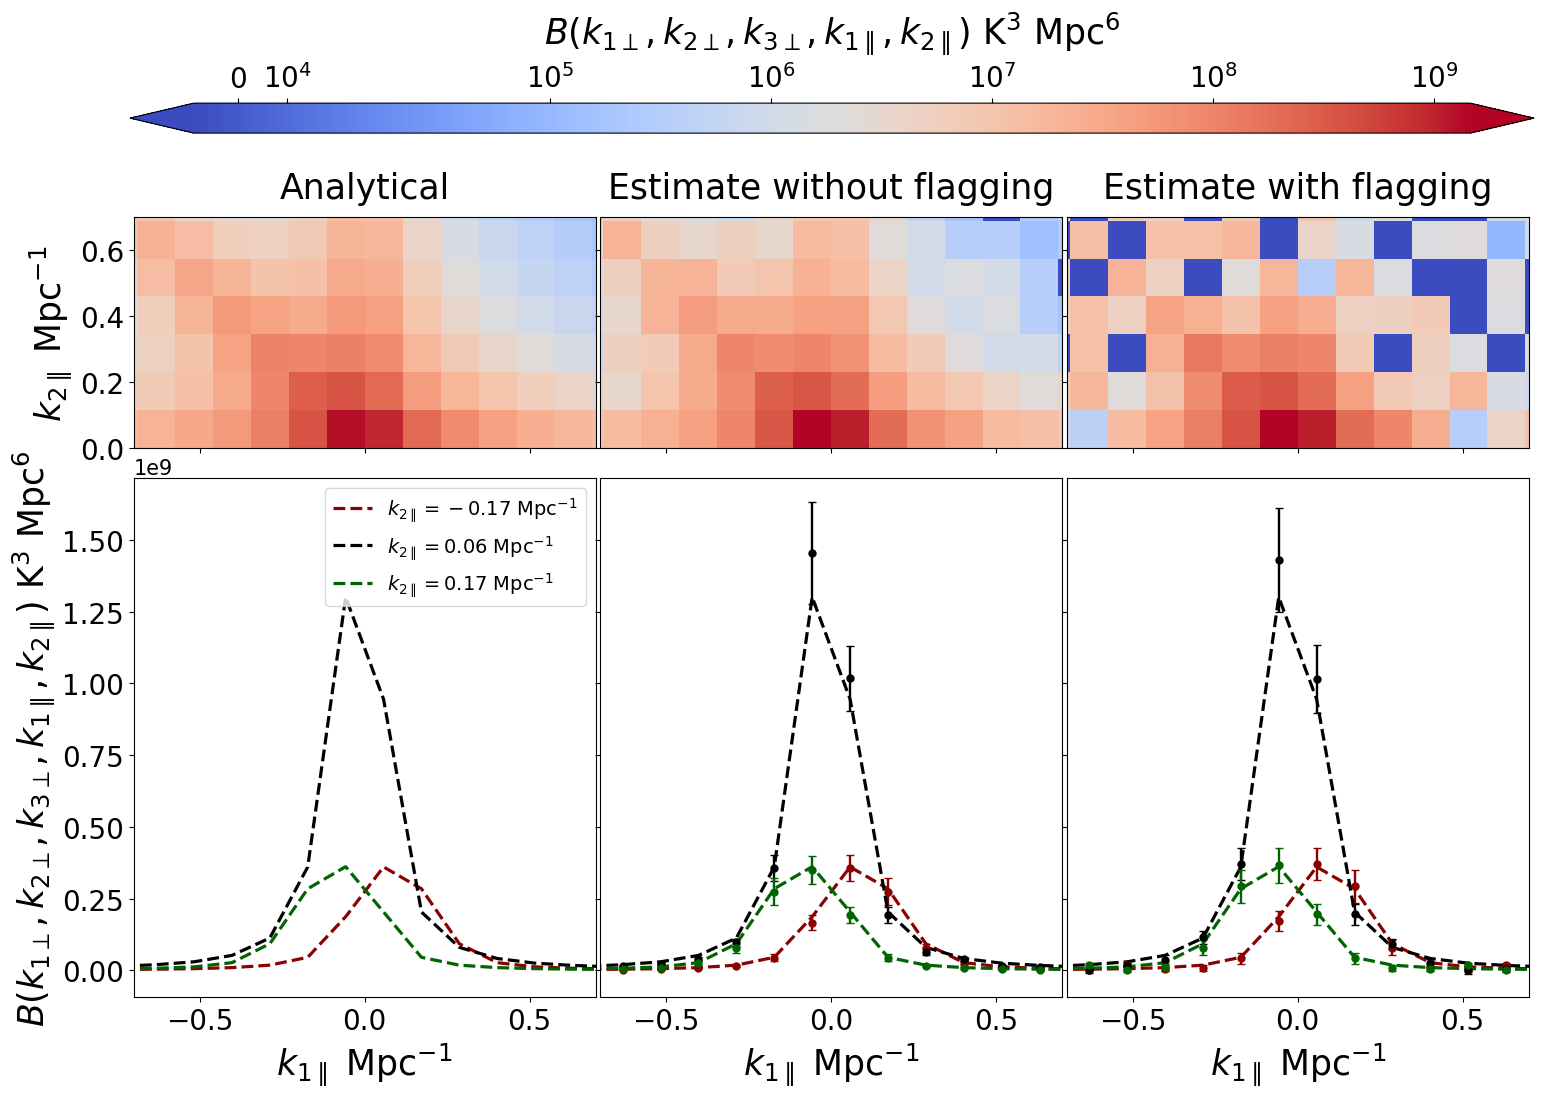

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

# Calculate vmin and vmax from your data
vmin = -9000.01#min(np.min(binned_datak), np.min(cylbs_mean_NF), np.min(cylbs_mean_F))
vmax = max(np.max(binned_datak), np.max(cylbs_mean_NF), np.max(cylbs_mean_F))
xmin = np.min(k1ll_xvals)
xmax = np.max(k1ll_xvals)
ymin = np.min(k1ll_xvals)
ymax = np.max(k1ll_xvals)
cmap = 'coolwarm'
# Define a linear threshold for the symmetric log scaling
linthresh = 5e4  # Adjust this value as needed for your data

# Create a SymLogNorm instance with your chosen parameters
symlog_norm = colors.SymLogNorm(linthresh=linthresh, vmin=vmin, vmax=vmax)

# Create a figure with two subplots side by side
fig, ax = plt.subplots(2, 3, figsize=(18, 12),sharey=False, sharex=True)
for ii in range(1, 3):
    ax[0, ii].sharey(ax[0, 0])  
    ax[1, ii].sharey(ax[1, 0])
    ax[0, ii].tick_params(labelleft=False)
    ax[1, ii].tick_params(labelleft=False)
    
     
    
# Plot the first image using SymLogNorm
im1 = ax[0,0].imshow(binned_datak, origin='lower',aspect='equal',extent=[xmin, xmax,ymin, ymax],cmap=cmap, norm=symlog_norm)
ax[0,0].set_title(r"Analytical",fontsize=25,pad=14)

im2 = ax[0,1].imshow(cylbs_mean_NF, origin='lower',aspect='equal',extent=[xmin, xmax,ymin, ymax],cmap=cmap, norm=symlog_norm)
ax[0,1].set_title(r"Estimate without flagging",fontsize=25,pad=14)

im3 = ax[0,2].imshow(cylbs_mean_F, origin='lower',aspect='equal',extent=[xmin, xmax,ymin, ymax],cmap=cmap, norm=symlog_norm)
ax[0,2].set_title(r"Estimate with flagging",fontsize=25,pad=14)

# Create a ScalarMappable for the colorbar with the same normalization and colormap
sm = cm.ScalarMappable(norm=symlog_norm, cmap=cmap)
sm.set_array([])

cbar_ax = fig.add_axes([0.123, 0.83, .78, 0.025]) 
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', location='top',extend='both')
cbar.set_label(r'$B(k_{1\perp},k_{2\perp},k_{3\perp},k_{1\parallel},k_{2\parallel})~{\rm K}^3~ {\rm Mpc}^6$',fontsize=25,labelpad=15)
cbar.ax.tick_params(labelsize=20)


ax[1,0].set_xlabel(r'$k_{1\parallel}$ Mpc$^{-1}$',fontsize=25)
ax[1,1].set_xlabel(r'$k_{1\parallel}$ Mpc$^{-1}$',fontsize=25)
ax[1,2].set_xlabel(r'$k_{1\parallel}$ Mpc$^{-1}$',fontsize=25)
ax[0,0].set_ylabel(r'$k_{2\parallel}$ Mpc$^{-1}$',fontsize=25)
ax[1,0].set_ylabel(r'$B(k_{1\perp},k_{2\perp},k_{3\perp},k_{1\parallel},k_{2\parallel})~{\rm K}^3~ {\rm Mpc}^6$',fontsize=25)

for ii in range(2):
    for jj in range(3):
        ax[ii,jj].tick_params(labelsize=20)


limval = .7
for jj in range(3):
    ax[0,jj].set_xlim(-limval,limval)
    ax[0,jj].set_ylim(0,limval)
#     ax[0,jj].set_ylim(0,ymax)


### lineplots ########
ii_vals = [8,10,11]
clrs = ['darkred','black','darkgreen']
count=0
for ii in ii_vals:
    for jj in range(3):
        ax[1,jj].plot(x_centers, binned_datak[ii], color=clrs[count],label=r'$k_{2\parallel}=%.2f$ Mpc$^{-1}$'%(x_centers[ii]),lw=2.3,linestyle='--')
    ax[1,1].errorbar(x_centers, cylbs_mean_NF[ii], yerr=cylbs_stdT_NF[ii], fmt='.', capsize=3, color=clrs[count], markersize=10,elinewidth=1.7)
    ax[1,2].errorbar(x_centers, cylbs_mean_F[ii], yerr=cylbs_stdT_F[ii], fmt='.', capsize=3, color=clrs[count], markersize=10,elinewidth=1.7)
    count+=1

ax[1,0].legend(fontsize=14)

offset_text = ax[1, 0].yaxis.get_offset_text()
offset_text.set_fontsize(15)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=.01, hspace=-.22)
plt.draw()

# 3D BS

### Data

In [9]:
k1_bins = 12
t_bins  = 5
mu_bins = 5

k1_edges = np.logspace(np.log10(0.002), np.log10(1.6), k1_bins + 1)
t_edges  = np.linspace(.5, 1., t_bins + 1)
mu_edges = np.linspace(.5, 1., mu_bins + 1)

k1_avg = (k1_edges[:-1] + k1_edges[1:]) / 2
t_avg  = (t_edges[:-1]  + t_edges[1:])  / 2
mu_avg = (mu_edges[:-1] + mu_edges[1:]) / 2

In [10]:
bs_std_npz_F = np.load("fig_5_6_8_b.npz",allow_pickle=True)
Est_bispec_F = bs_std_npz_F['arr_0']
std_bispec_F = bs_std_npz_F['arr_1']

ana_bs_num_npz_F = np.load("fig_5_6_8_a.npz",allow_pickle=True)
Ana_bispec_F = ana_bs_num_npz_F['arr_0'] * Tbar3
num_bispec_F = ana_bs_num_npz_F['arr_1'] 

In [11]:
bs_std_npz_NF = np.load("fig_6_7_b.npz",allow_pickle=True)
Est_bispec_NF = bs_std_npz_NF['arr_0'] 
std_bispec_NF = bs_std_npz_NF['arr_1'] 

ana_bs_num_npz_NF = np.load("fig_6_7_a.npz",allow_pickle=True)
Ana_bispec_NF = ana_bs_num_npz_NF['arr_0'] * Tbar3 
num_bispec_NF = ana_bs_num_npz_NF['arr_1'] 
# Est_bispec_F[2,4,0]=np.nan
# Est_bispec_NF[2,4,0]=np.nan

### Figure 5

/tmp/ipykernel_907439/2108990265.py:17: RuntimeWarning: invalid value encountered in divide
  b1_F = Est_bispec_F[:,tt,mm]/num_bispec_F[:,tt,mm]
/tmp/ipykernel_907439/2108990265.py:18: RuntimeWarning: invalid value encountered in divide
  c1_F = std_bispec_F[:,tt,mm]/num_bispec_F[:,tt,mm]
/tmp/ipykernel_907439/2108990265.py:19: RuntimeWarning: invalid value encountered in divide
  th_bs = Ana_bispec_F[:,tt,mm]/num_bispec_F[:,tt,mm]
/tmp/ipykernel_907439/2108990265.py:21: RuntimeWarning: invalid value encountered in divide
  b1_NF = Est_bispec_F[:,tt,mm]/num_bispec_F[:,tt,mm]
/tmp/ipykernel_907439/2108990265.py:22: RuntimeWarning: invalid value encountered in divide
  c1_NF = std_bispec_F[:,tt,mm]/num_bispec_F[:,tt,mm]
/home/sukhdeep/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


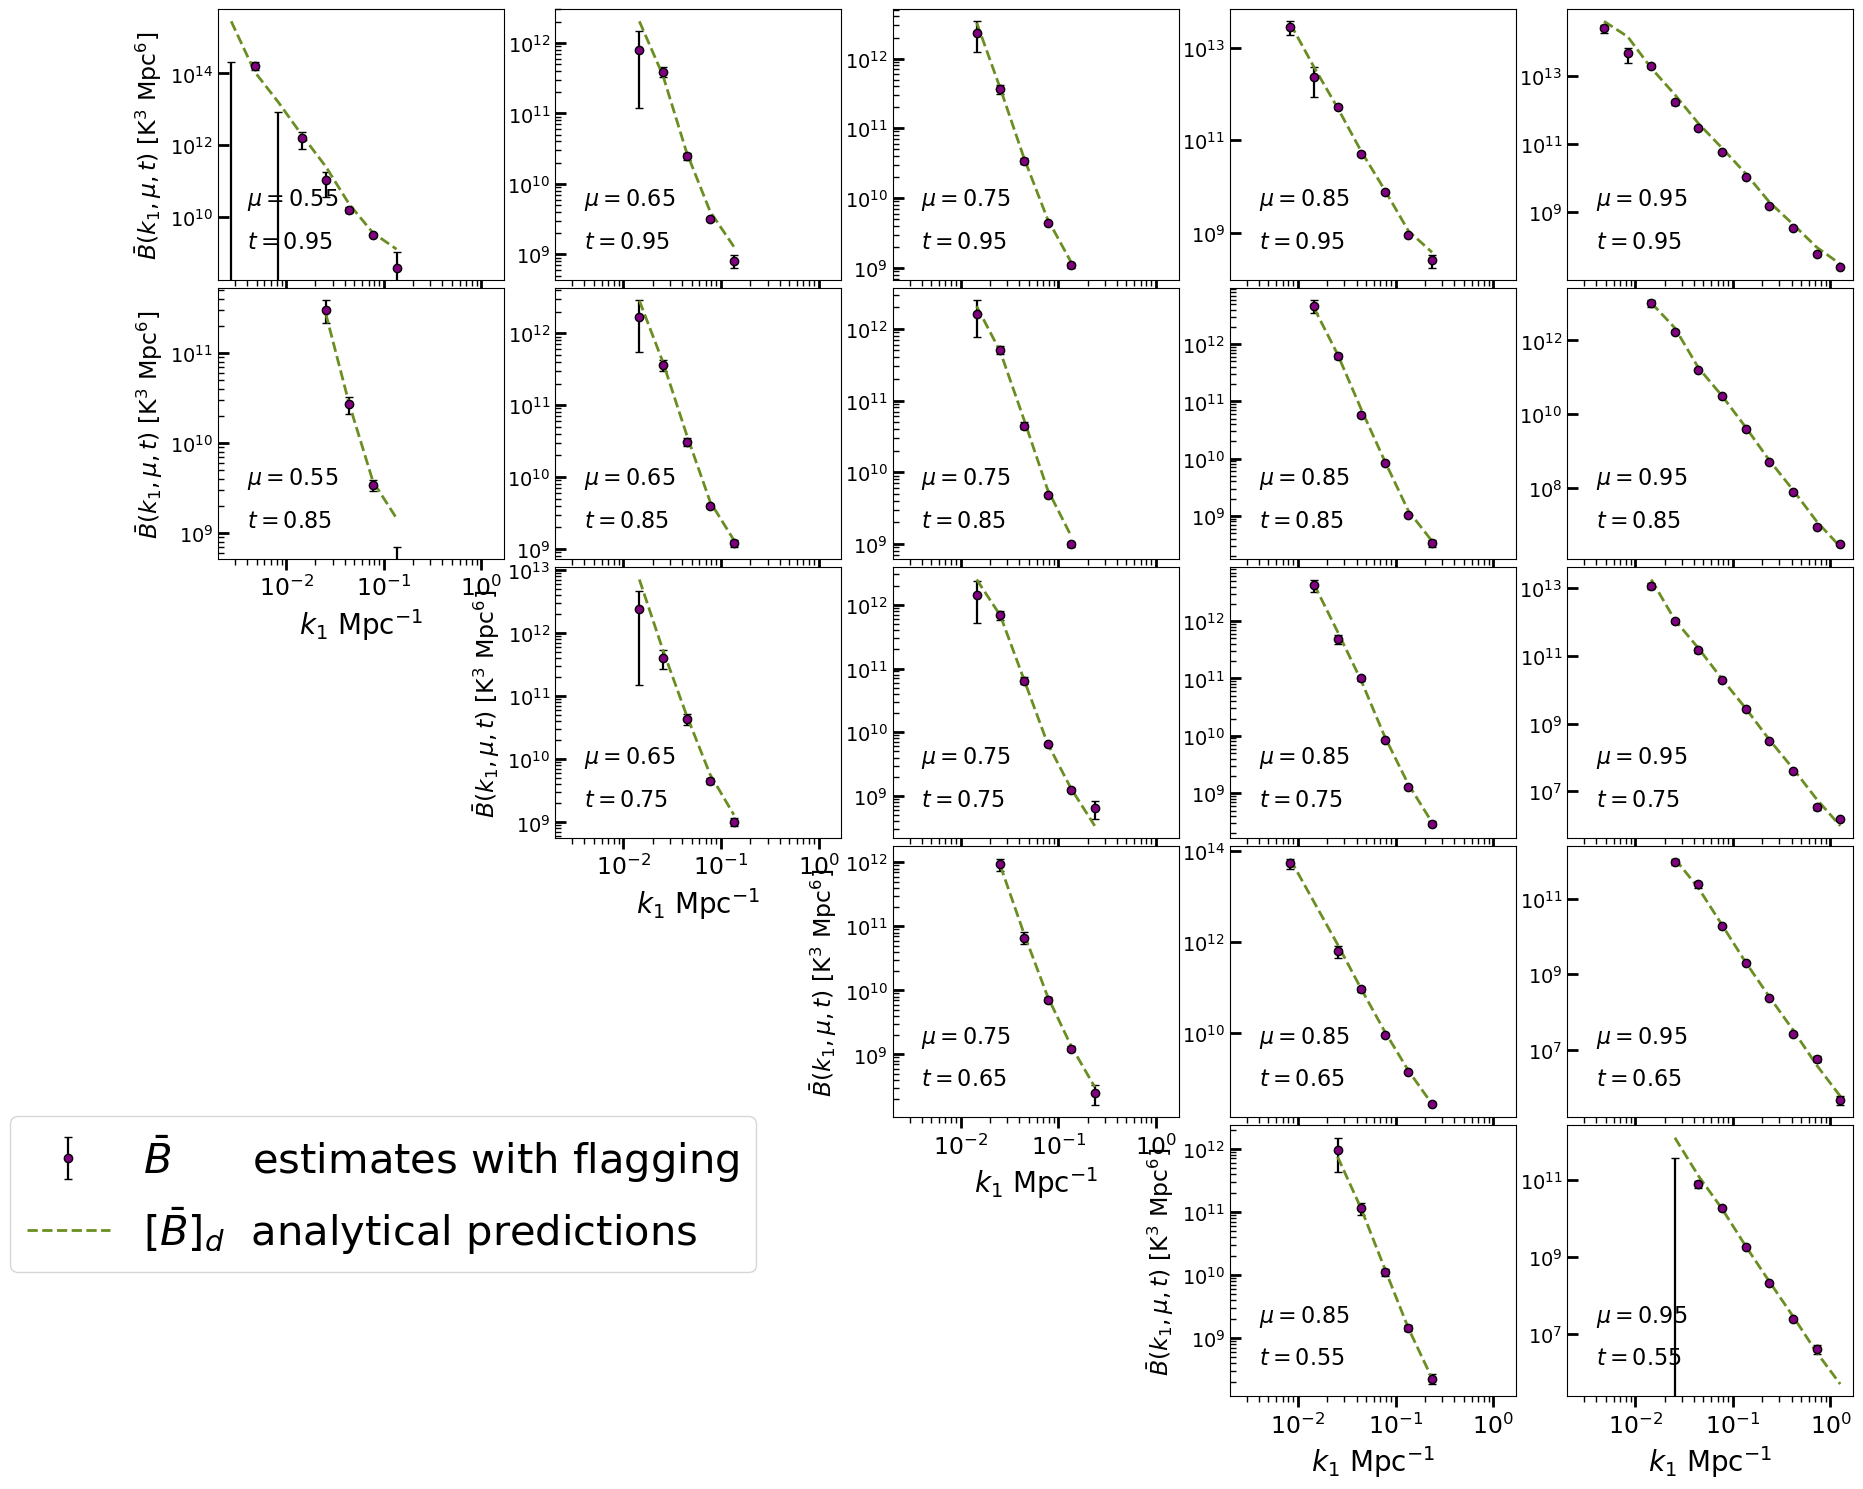

In [12]:
num_bins = 5  # As the subplots grid is 5x5

# Create a 5x5 subplot figure
fig, axs = plt.subplots(num_bins, num_bins, figsize=(15, 15), sharex=True, sharey=False)

lbl_fz = 20
# Iterate over each subplot to plot data
for i in range(num_bins):
    for j in range(num_bins):
        
        ax = axs[i,j]
        
        mm = j
        tt = abs(i-(num_bins-1))
        
        a1 = k1_avg
        b1_F = Est_bispec_F[:,tt,mm]/num_bispec_F[:,tt,mm]
        c1_F = std_bispec_F[:,tt,mm]/num_bispec_F[:,tt,mm]
        th_bs = Ana_bispec_F[:,tt,mm]/num_bispec_F[:,tt,mm]
        
        b1_NF = Est_bispec_F[:,tt,mm]/num_bispec_F[:,tt,mm]
        c1_NF = std_bispec_F[:,tt,mm]/num_bispec_F[:,tt,mm]
        

        # Plot mean data with error bars
        ax.errorbar(a1, b1_F, yerr=c1_F, fmt='o',markersize=6, elinewidth=1.6, capsize=3,markeredgecolor='black', color='purple', ecolor='black',label=r'$\bar{B}~~~~$  estimates with flagging')
#         ax.errorbar(a1, b1_NF, yerr=c1_NF, fmt='o',markersize=6, elinewidth=1.6, capsize=3,markeredgecolor='black', color='green', ecolor='black',label=r'$B$ (estimated)')

        
        if (j==3 and (i==2 or i==3)) or (i==2 and (j==1 or j==4) or (i==4 and j==3)):
            valid_indices = ~np.isnan(a1) & ~np.isnan(th_bs)
            a1 = a1[valid_indices]
            th_bs = th_bs[valid_indices]
        
        # Plot the dashed line (final_u1, final_ana)
        ax.plot(a1, th_bs, linestyle='--',color='olivedrab',linewidth=2, label=r'$[\bar{B}]_d~$ analytical predictions')
        
        ax.set_yscale("log")
        ax.set_xscale("log")
        
        
        ax.tick_params(axis='y', which='both', direction='in', labelsize=14)
        ax.tick_params(axis='x',labelsize=17)  
        
        ax.tick_params(axis='both', which='major', length=8, width=2)
        ax.tick_params(axis='both', which='minor', length=4, width=1)


        # Set axis labels
        if (i == num_bins - 1):
            ax.set_xlabel(r'$k_1$ Mpc$^{-1}$',size=lbl_fz)
        if j == 0:
            ax.set_ylabel(r'$\bar{B}(k_1, \mu, t)~[{\rm K}^3~{\rm Mpc}^6]$',size=17)
            
        if (i==1 and j==0) or(i==2 and j==1) or (j==2 and i==3) or (j==3 and i==4):
            ax.set_xlabel(r'$k_1$ Mpc$^{-1}$',size=lbl_fz)
            ax.set_ylabel(r'$\bar{B}(k_1, \mu, t)~[{\rm K}^3~{\rm Mpc}^6]$',size=17)
            ax.tick_params(labelbottom=True)


# Adjust layout to avoid overlap
plt.tight_layout()

# Add a legend to the first subplot (if you want it globally)
handles, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='center left', ncol=1,fontsize=20)
fig.legend(handles[::-1], labels[::-1], loc='center', bbox_to_anchor=(0.1, 0.2), fontsize=30)


axs[2][0].axis('off')
axs[3][0].axis('off')
axs[3][1].axis('off')
axs[4][0].axis('off')
axs[4][1].axis('off')
axs[4][2].axis('off')


for i in range(num_bins):
    for j in range(num_bins):
        mm = j
        tt = abs(i-(num_bins-1))
        if (((mm*tt>.5) or i==0 or i==1 or j==3 or j==4)):
            if not (i == 3 and j == 1):
                ax = axs[i,j]
                ax.text(0.1, 0.25, f'$\mu = {0.55 + 0.1*mm:.2f}$', ha='left', va='bottom',transform=ax.transAxes,fontsize=16)
                ax.text(0.1, 0.1, f'$t = {0.55 + 0.1*tt:.2f}$', ha='left', va='bottom',transform=ax.transAxes,fontsize=16)
                
                

#
fig.subplots_adjust(left=-.01, bottom=None, right=1.08, top=None, wspace=0.18, hspace=.03) 

### Figure 6

/tmp/ipykernel_907439/3168328411.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ncw=plt.cm.get_cmap('viridis')#viridis
/tmp/ipykernel_907439/3168328411.py:22: RuntimeWarning: invalid value encountered in divide
  fft_mpl_NF = Est_bispec_NF[ii]/num_bispec_NF[ii]
/tmp/ipykernel_907439/3168328411.py:23: RuntimeWarning: invalid value encountered in divide
  ana_mpl_NF = Ana_bispec_NF[ii]/num_bispec_NF[ii]
/tmp/ipykernel_907439/3168328411.py:24: RuntimeWarning: invalid value encountered in divide
  sd_mpl_NF  = std_bispec_NF[ii]/num_bispec_NF[ii]
/tmp/ipykernel_907439/3168328411.py:26: RuntimeWarning: invalid value encountered in divide
  fft_mpl_F = Est_bispec_F[ii]/num_bispec_F[ii]
/tmp/ipykernel_907439/3168328411.py:27: RuntimeWarning: invalid value encountered in divide
  ana_mpl_F = Ana_bispec_F[ii]/num_bispec_

Result for k1=0.078


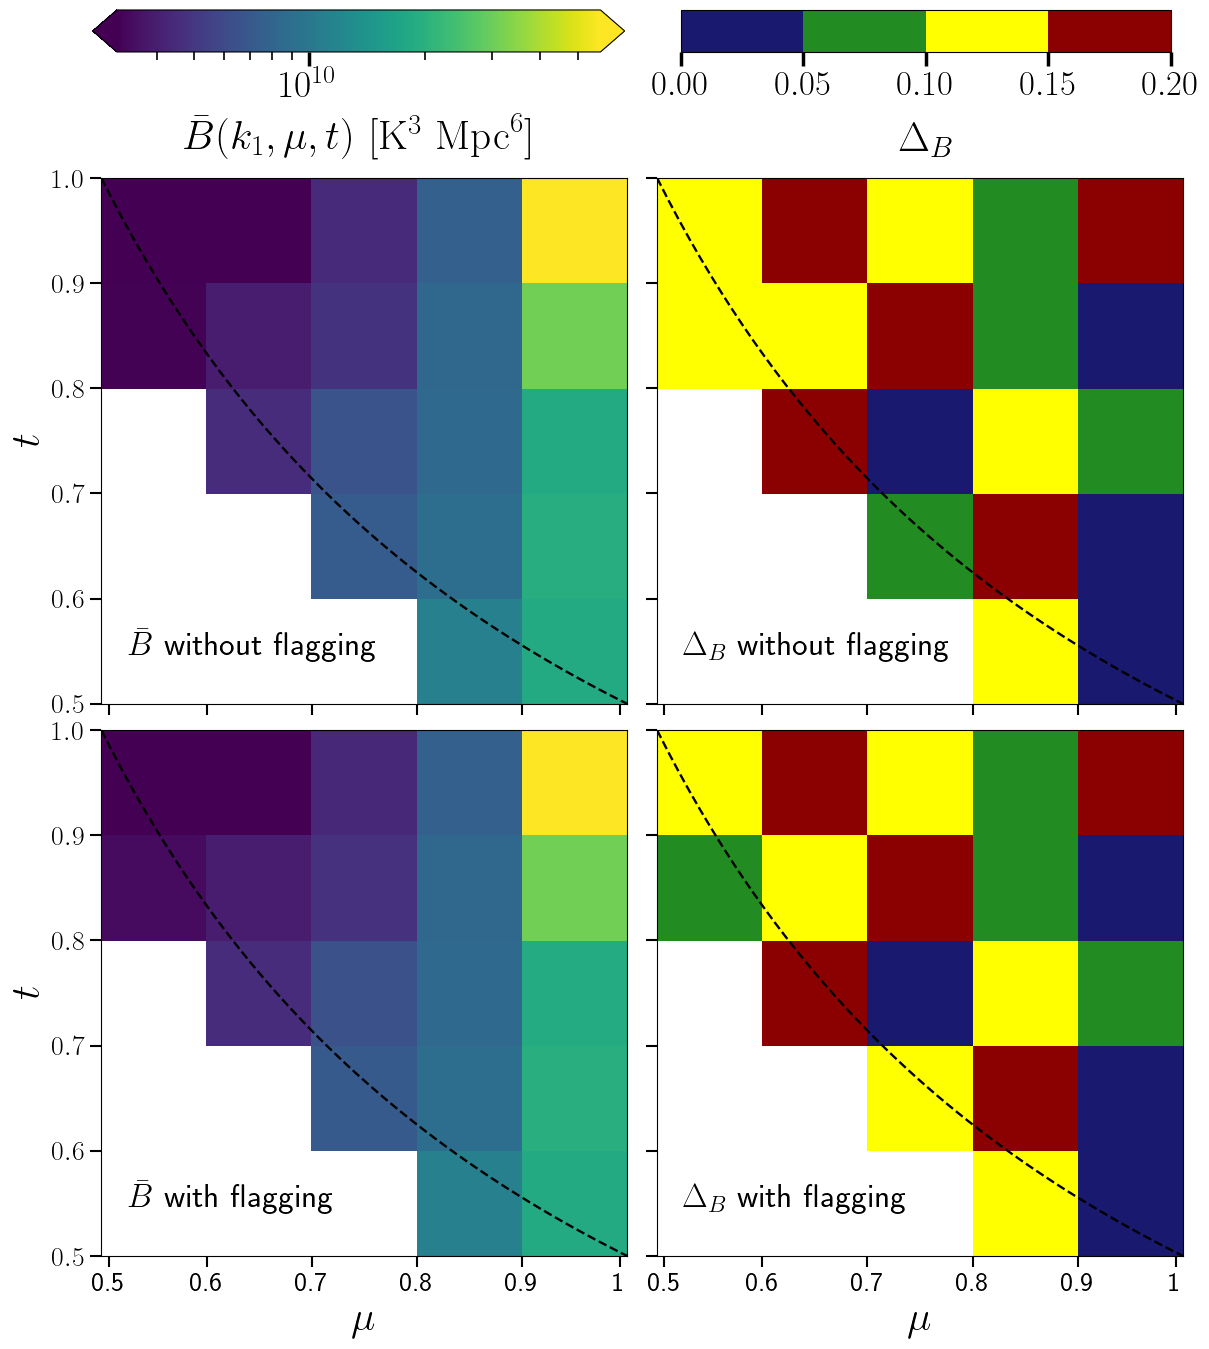

In [13]:
plt.rc('text',usetex=True)
xll = .5;  xul = 1;  yll = .5;  yul = 1

ncw=plt.cm.get_cmap('viridis')#viridis 

colors_cstmz = ['midnightblue', 'forestgreen', 'yellow', 'darkred'] #goldenrod, darkorange
bounds = [0, 0.05, .1, .15, .2]
ncw_cstmz = plt.cm.colors.ListedColormap(colors_cstmz)
norm_cstmz = plt.cm.colors.BoundaryNorm(bounds, ncw_cstmz.N)
# ###========================l = 2=================================


MuT_bin=12
fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(7*2,7*2), gridspec_kw={'width_ratios': [1, 1]},sharey=True,sharex=True)


ii=6#7

print('Result for k1=%.3f'%k1_avg[ii])


fft_mpl_NF = Est_bispec_NF[ii]/num_bispec_NF[ii]
ana_mpl_NF = Ana_bispec_NF[ii]/num_bispec_NF[ii]
sd_mpl_NF  = std_bispec_NF[ii]/num_bispec_NF[ii]

fft_mpl_F = Est_bispec_F[ii]/num_bispec_F[ii]
ana_mpl_F = Ana_bispec_F[ii]/num_bispec_F[ii]
sd_mpl_F  = std_bispec_F[ii]/num_bispec_F[ii]

deviation_F = (np.abs(fft_mpl_F-ana_mpl_F))/ana_mpl_F
deviation_NF = (np.abs(fft_mpl_NF-ana_mpl_NF))/ana_mpl_NF

mini=np.min([np.nanmin(ana_mpl_F),np.nanmin(fft_mpl_F),np.nanmin(ana_mpl_NF),np.nanmin(fft_mpl_NF)])
maxi=np.max([np.nanmax(ana_mpl_F),np.nanmax(fft_mpl_F),np.nanmax(ana_mpl_NF),np.nanmax(fft_mpl_NF)])

# clr_norm=mpl.colors.SymLogNorm(.01,vmin=mini,vmax=maxi)
clr_norm=mpl.colors.LogNorm()
# clr_norm= mpl.colors.Normalize()   ##mpl.colors.LogNorm(2e8) #

cp    =  axes2[0,0].imshow(fft_mpl_NF, extent=[xll, xul, yll, yul], origin='lower', cmap=ncw,norm=clr_norm)#
axes2[1,0].imshow(fft_mpl_F, extent=[xll, xul, yll, yul], origin='lower', cmap=ncw,norm=clr_norm)#


clr_norm=mpl.colors.SymLogNorm(.01)

cp_err=axes2[0,1].imshow(deviation_NF, extent=[xll, xul, yll, yul], origin='lower', cmap=ncw_cstmz,norm=norm_cstmz )
axes2[1,1].imshow(deviation_F, extent=[xll, xul, yll, yul], origin='lower', cmap=ncw_cstmz,norm=norm_cstmz )

lbls=[[r'$\bar{B}$ without flagging',r'$\Delta_{B}$ without flagging'],
     [r'$\bar{B}$ with flagging',r'$\Delta_{B}$ with flagging']]
for lz in range(2):  
    for lzz in range(2):
        axes2[lz,lzz].tick_params(axis='y', which='both', direction='out' , length=8, width=1.5,labelsize=20)
        axes2[lz,lzz].tick_params(axis='x',labelsize=20, length=8, width=1.5)  
        axes2[lz,lzz].text(0.05, 0.08, lbls[lz][lzz], ha='left', va='bottom',transform=axes2[lz,lzz].transAxes,fontsize=24)

axes2[0,0].set_ylabel(r'$t$',size=30)
axes2[1,0].set_ylabel(r'$t$',size=30)
axes2[1,0].set_xlabel(r'$\mu$',size=30)
axes2[1,1].set_xlabel(r'$\mu$',size=30)

 #####################################   Add colorbars #############################

cax = fig2.add_axes([0.12,.97,.38,0.03])  ## right, up, width, height , right=-.08
cbar=fig2.colorbar(cp,cax=cax, label=r'$B_(k_1,\mu,t)~{\rm K}^3$',extend='both',pad=1,orientation="horizontal")
cbar.set_label(label=r'',size=30,weight='bold',labelpad=1,loc='center')
cbar.ax.tick_params(labelsize=27,labelbottom=True,labelleft=False,labelright=False,labeltop=False,right=False,left=False,bottom=True,top=False)
# cbar.ax.xaxis.set_minor_locator(ticker.SymmetricalLogLocator(linthresh=.01,base=10,subs=[2, 3, 4, 5, 6, 7, 8, 9]))
cbar.ax.tick_params(which='major', length=10,width=2.5)
cbar.ax.tick_params(which='minor', length=6,width=1.2,left=True,right=False)
cbar.set_label(label=r'$\bar{B}(k_1,\mu,t)~[{\rm K}^3~{\rm Mpc}^6]$',size=30,weight='bold',labelpad=40,loc='center',va='bottom')
# axes2[0,0].text(.96, 1.135, r'$\times 10^{10}$', fontsize=25)
  
    

up_param=[.92,.9,.442,.21] 
cax = fig2.add_axes([0.54,.97,.35,0.03])  ## right, up, width, height, right=0.283, width=.255
cbar=fig2.colorbar(cp_err,cax=cax, label=r'$B_0^0$',pad=1,orientation="horizontal")
cbar.set_label(label=r'',size=30,weight='bold',labelpad=1,loc='center')
cbar.ax.tick_params(labelsize=25,rotation=0)
#     cbar.ax.xaxis.set_minor_locator(ticker.SymmetricalLogLocator(linthresh=.0001,base=10,subs=[2, 3, 4, 5, 6, 7, 8, 9]))
cbar.ax.tick_params(which='major', length=10,width=2.5)
cbar.ax.tick_params(which='minor', length=6,width=1.2)
cbar.set_label(label=r'$\Delta_{B}$',size=30,weight='bold',labelpad=15,loc='center')

# ####################################################################################
    
for jz in range(2): 
    for jzz in range(2):
        axes2[jz,jzz].set_xticks([.507,.6,.7,.8,.9,.993])
        axes2[jz,jzz].set_xticklabels(['0.5','0.6','0.7','0.8','0.9','1'])
    

    

x=np.linspace(.5,1,50)
y=1/(2*x)
for lz in range(2):
    for lzz in range(2):
        axes2[lz,lzz].plot(x,y,"--",color="black",linewidth=1.7)

fig2.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05) 

### Figure 7 

/tmp/ipykernel_907439/3127848131.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ncw=plt.cm.get_cmap('viridis_r')
/tmp/ipykernel_907439/3127848131.py:26: RuntimeWarning: invalid value encountered in divide
  fft_mpl = Est_bispec_NF[ii]/num_bispec_NF[ii]
/tmp/ipykernel_907439/3127848131.py:27: RuntimeWarning: invalid value encountered in divide
  ana_mpl = Ana_bispec_NF[ii]/num_bispec_NF[ii]
/tmp/ipykernel_907439/3127848131.py:28: RuntimeWarning: invalid value encountered in divide
  sd_mpl  = std_bispec_NF[ii]/num_bispec_NF[ii]


Text(0.38, 0.5, 'Without flagging')

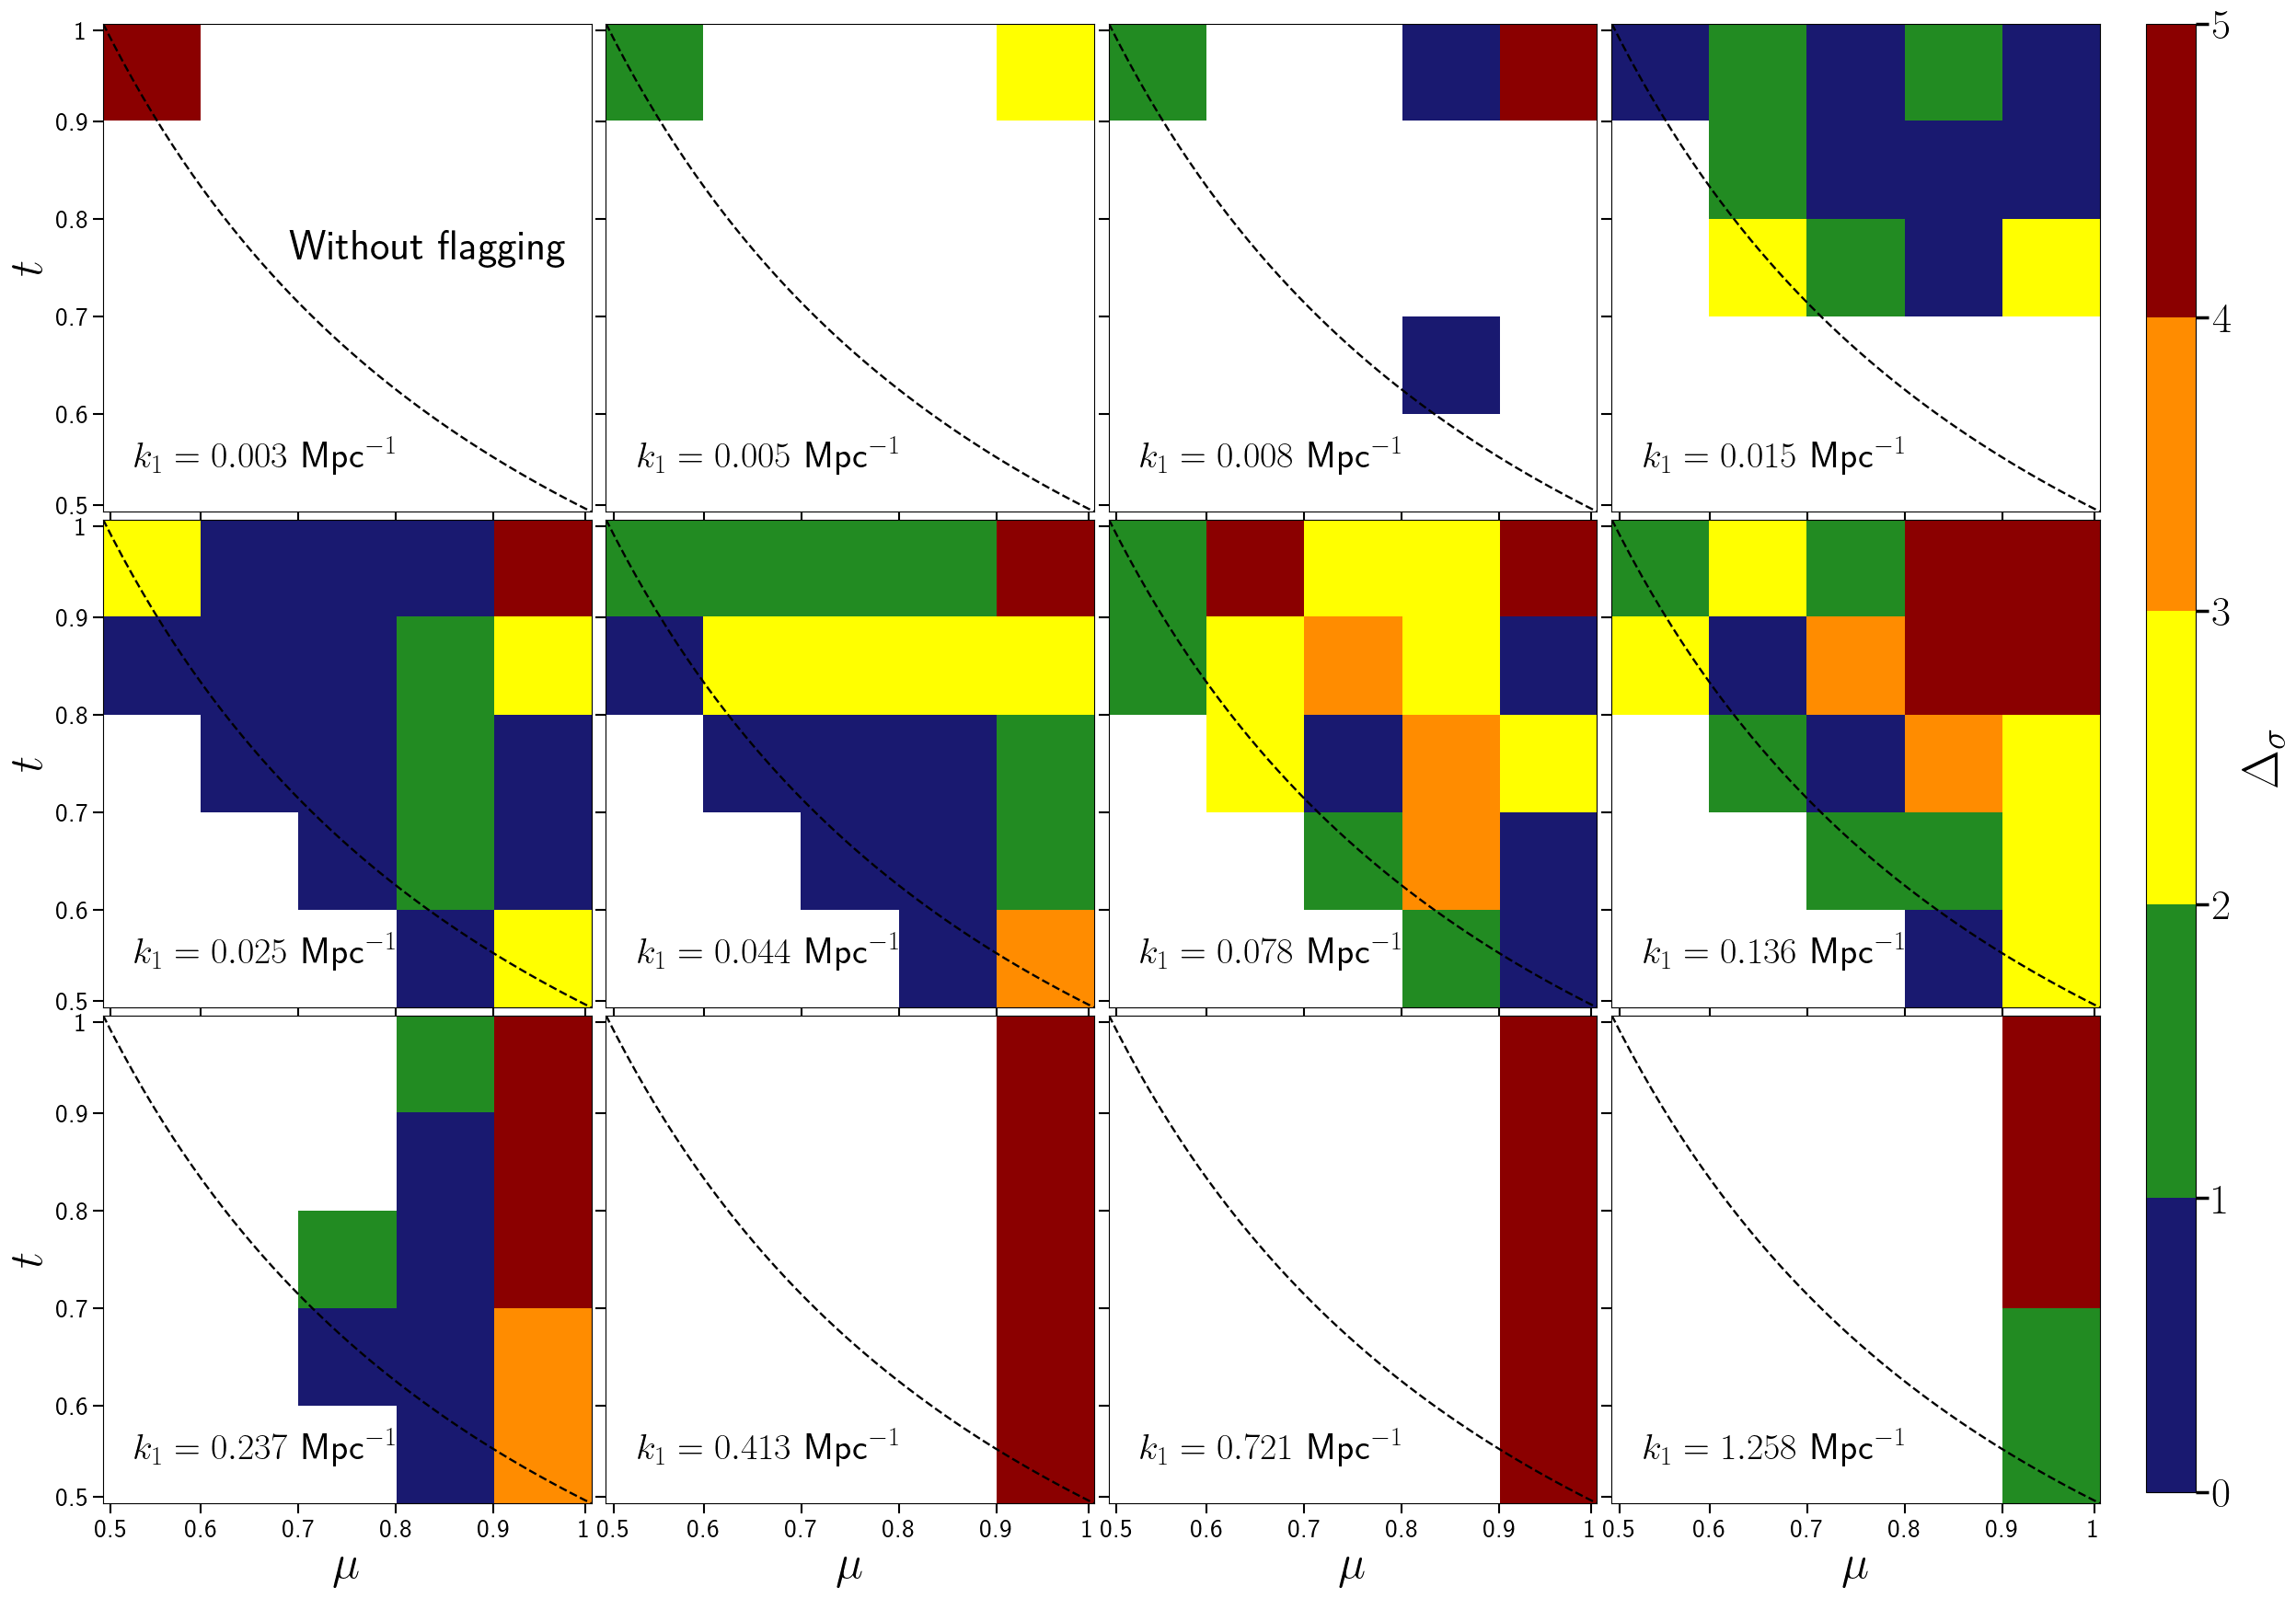

In [14]:
plt.rc('text',usetex=True)
xll = .5;  xul = 1;  yll = .5;  yul = 1

nrm_val=[.1,.6,.01,.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
# clr_norm=mpl.colors.SymLogNorm(10**(-1),vmin=0,vmax=10)

ncw=plt.cm.get_cmap('viridis_r')  

colors_cstmz = ['midnightblue', 'forestgreen', 'yellow', 'darkorange','darkred'] #goldenrod, darkorange
bounds = [0, 1, 2, 3, 4, 5]
ncw_cstmz = plt.cm.colors.ListedColormap(colors_cstmz)
norm_cstmz = plt.cm.colors.BoundaryNorm(bounds, ncw_cstmz.N)
# ###========================l = 2=================================


MuT_bin=12
fig2, axes2 = plt.subplots(nrows=3, ncols=4, figsize=(7*4,7*3), gridspec_kw={'width_ratios': [1, 1,1,1]},sharex=True,sharey=True)


for ii in range(12):
    
    
    i = ii // 4
    j = ii % 4
    
    fft_mpl = Est_bispec_NF[ii]/num_bispec_NF[ii]
    ana_mpl = Ana_bispec_NF[ii]/num_bispec_NF[ii]
    sd_mpl  = std_bispec_NF[ii]/num_bispec_NF[ii]

    deviation = (np.abs(fft_mpl-ana_mpl))/sd_mpl

    cp_err=axes2[i][j].imshow(deviation, extent=[xll, xul, yll, yul], origin='lower', cmap=ncw_cstmz,norm=norm_cstmz )

    axes2[i][j].text(0.065, 0.076, r'$k_1=%.3f$ Mpc$^{-1}$'%(k1_avg[ii]), ha='left', va='bottom',transform=axes2[i][j].transAxes,fontsize=29)

for jz in [0,1,2]:
    for lz in range(4):  
        axes2[jz][lz].tick_params(axis='y', which='both', direction='out' , length=8, width=1.5,labelsize=21)
        axes2[jz][lz].tick_params(axis='x',labelsize=21, length=8, width=1.5)  
        if jz==2:
            axes2[jz][lz].set_xlabel(r'$\mu$',size=37)
        if lz==0:
            axes2[jz][lz].set_ylabel(r'$t$',size=37)
#     axes2[lz].text(0.08, 0.08, lbls[lz], ha='left', va='bottom',transform=axes2[lz].transAxes,fontsize=25)




 #####################################   Add colorbars #############################

cax = fig2.add_axes([.918,.118,0.019,.76])  ## right, up, width, height, right=0.283, width=.255
cbar=fig2.colorbar(cp_err,cax=cax, label=r'$B_0^0$',pad=1,orientation="vertical")
cbar.set_label(label=r'',size=40,weight='bold',labelpad=1,loc='center')
cbar.ax.tick_params(labelsize=33,rotation=0)
#     cbar.ax.xaxis.set_minor_locator(ticker.SymmetricalLogLocator(linthresh=.0001,base=10,subs=[2, 3, 4, 5, 6, 7, 8, 9]))
cbar.ax.tick_params(which='major', length=10,width=2.5)
cbar.ax.tick_params(which='minor', length=6,width=1.2)
cbar.set_label(label=r'$\Delta_\sigma$',size=40,weight='bold',labelpad=8,loc='center')

# ####################################################################################
    
# fnt_sz=24
for jz in range(4):

    axes2[1][jz].set_xticks([.508,.6,.7,.8,.9,0.994])
    axes2[1][jz].set_xticklabels(['0.5','0.6','0.7','0.8','0.9','1'])
    axes2[1][jz].set_yticks([.507,.6,.7,.8,.9,.993])
    axes2[1][jz].set_yticklabels(['0.5','0.6','0.7','0.8','0.9','1'])


x=np.linspace(.5,1,50)
y=1/(2*x)
for jz in [0,1,2]:
    for lz in range(4):
        axes2[jz][lz].plot(x,y,"--",color="black",linewidth=1.7)
        
fig2.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.03, hspace=0) 
axes2[0][0].text(0.38, 0.5, r'Without flagging', ha='left', va='bottom',transform=axes2[0][0].transAxes,fontsize=33)  


### Figure 8

/tmp/ipykernel_907439/2284503153.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ncw=plt.cm.get_cmap('viridis_r')
/tmp/ipykernel_907439/2284503153.py:26: RuntimeWarning: invalid value encountered in divide
  fft_mpl = Est_bispec_F[ii]/num_bispec_F[ii]
/tmp/ipykernel_907439/2284503153.py:27: RuntimeWarning: invalid value encountered in divide
  ana_mpl = Ana_bispec_F[ii]/num_bispec_F[ii]
/tmp/ipykernel_907439/2284503153.py:28: RuntimeWarning: invalid value encountered in divide
  sd_mpl  = std_bispec_F[ii]/num_bispec_F[ii]


Text(0.42, 0.5, 'With flagging')

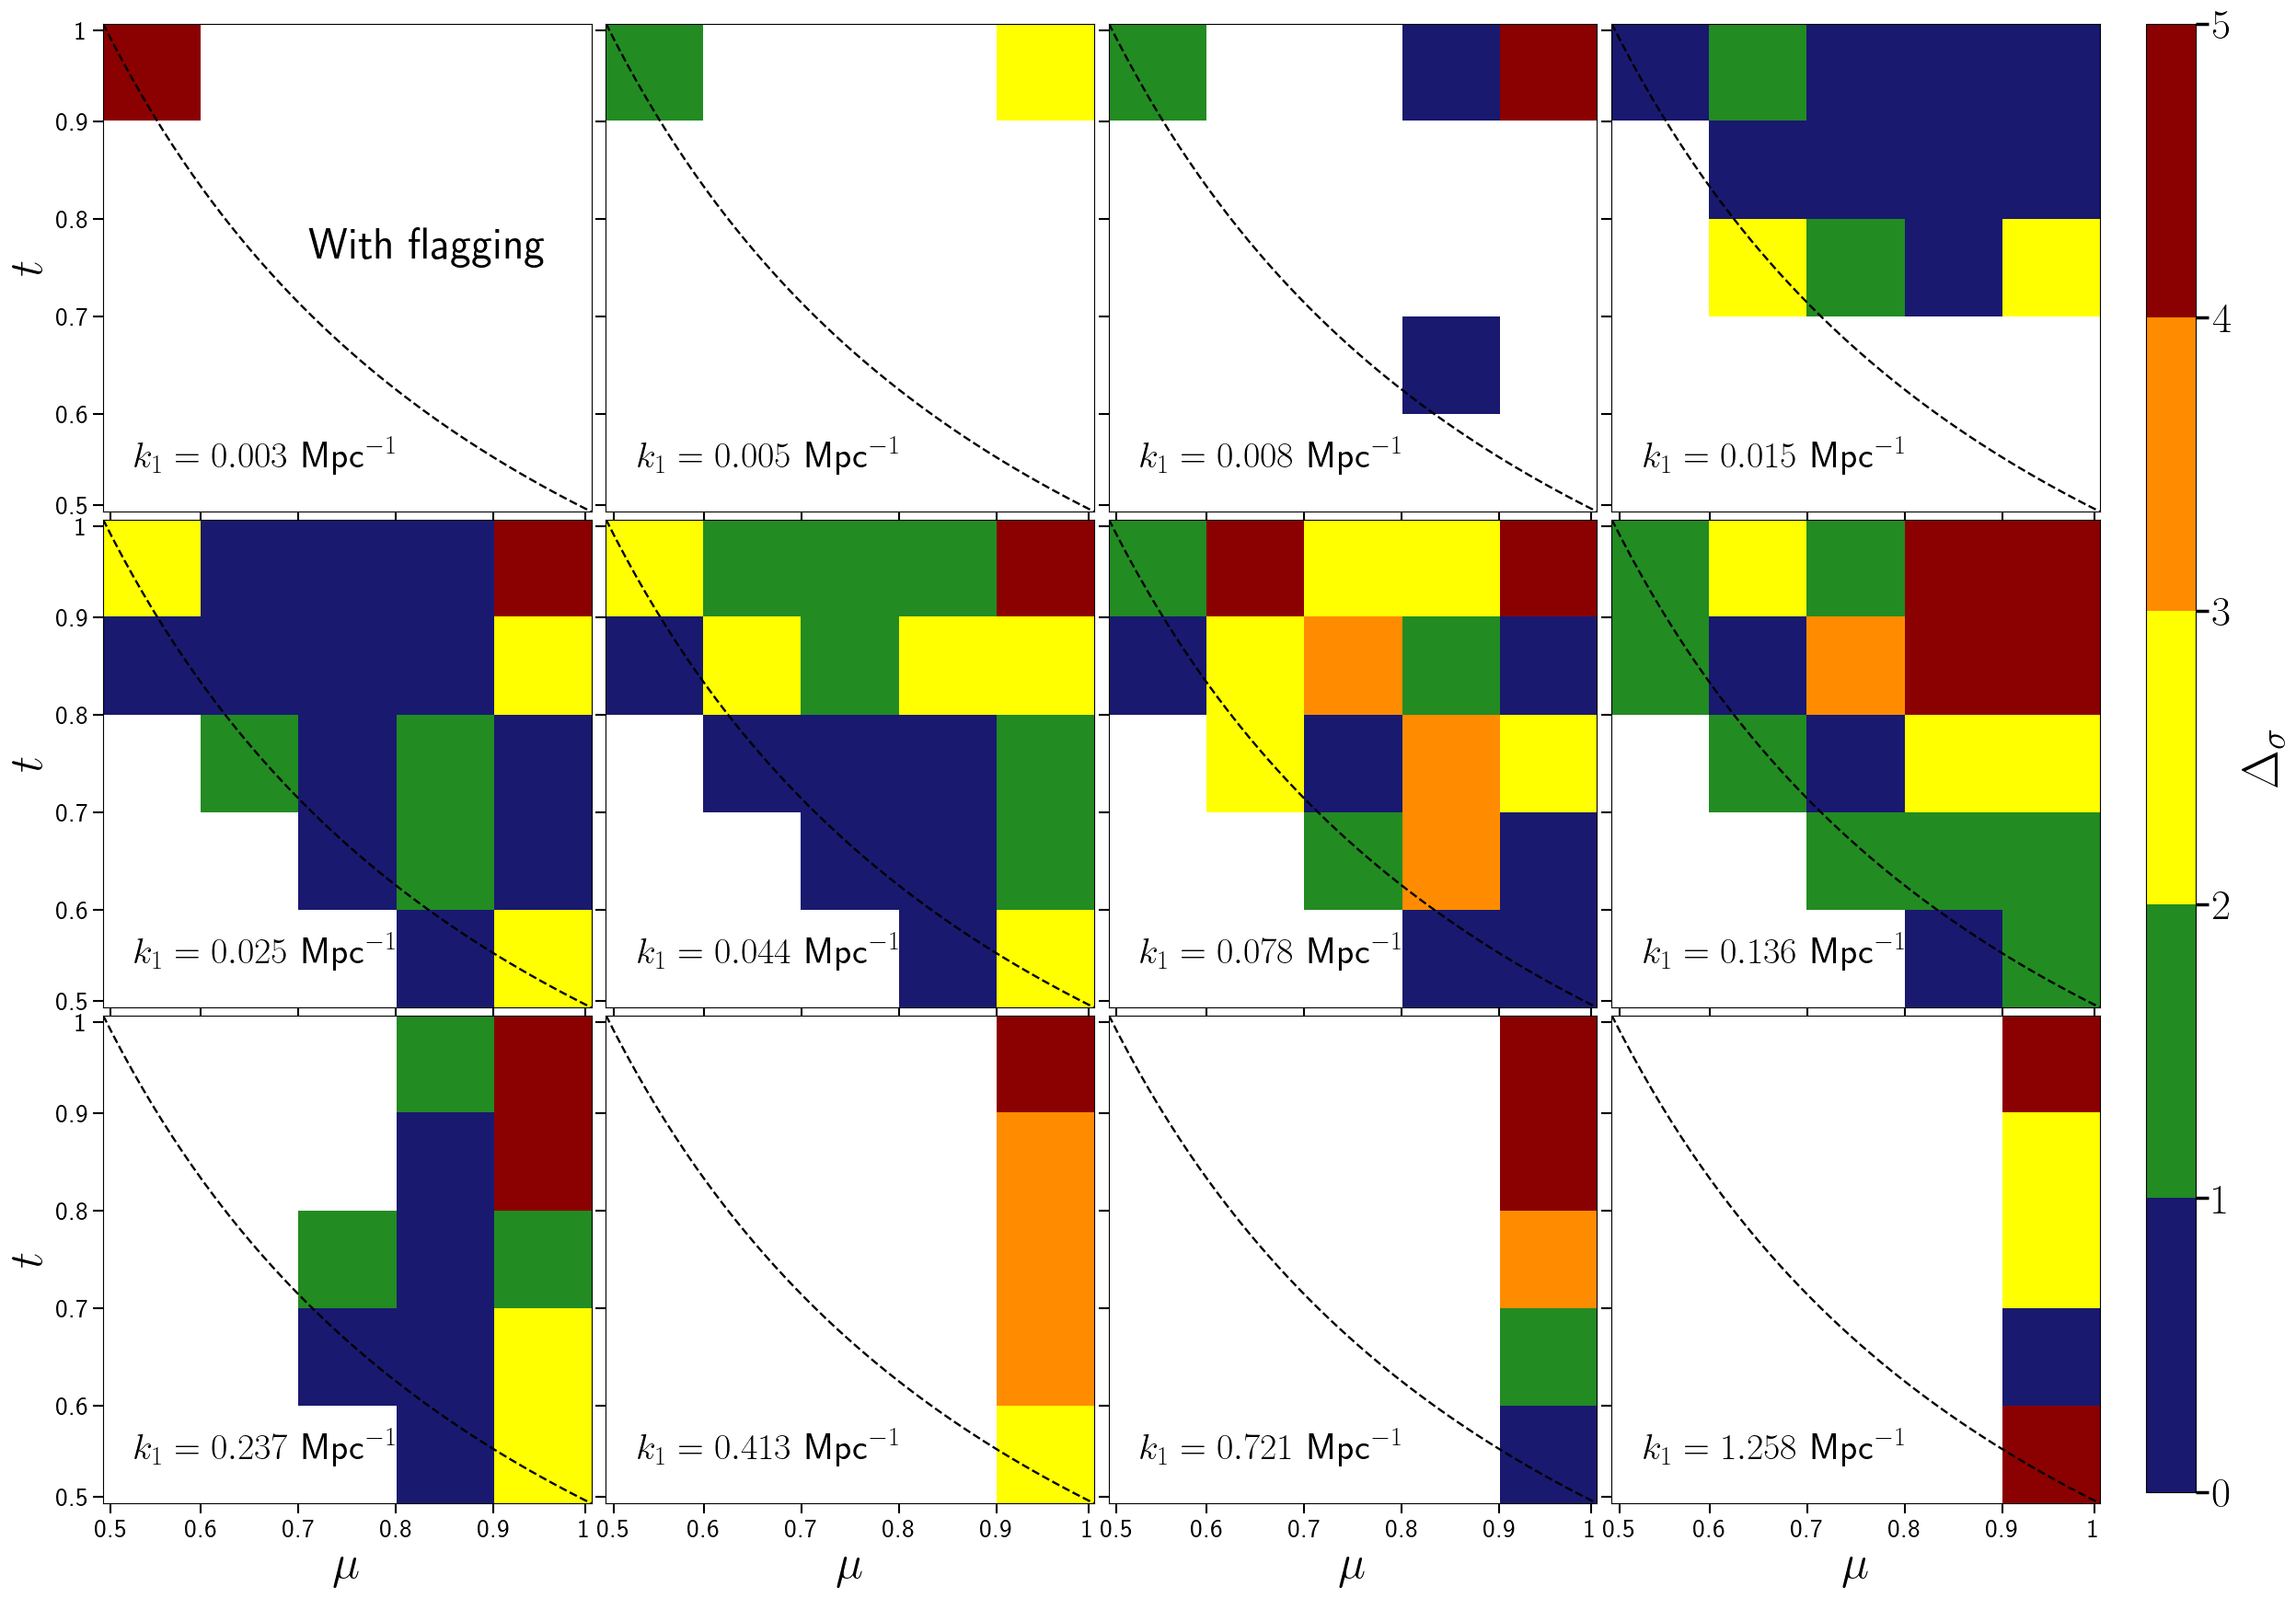

In [15]:
plt.rc('text',usetex=True)
xll = .5;  xul = 1;  yll = .5;  yul = 1

nrm_val=[.1,.6,.01,.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
# clr_norm=mpl.colors.SymLogNorm(10**(-1),vmin=0,vmax=10)

ncw=plt.cm.get_cmap('viridis_r')  

colors_cstmz = ['midnightblue', 'forestgreen', 'yellow', 'darkorange','darkred'] #goldenrod, darkorange
bounds = [0, 1, 2, 3, 4, 5]
ncw_cstmz = plt.cm.colors.ListedColormap(colors_cstmz)
norm_cstmz = plt.cm.colors.BoundaryNorm(bounds, ncw_cstmz.N)
# ###========================l = 2=================================


MuT_bin=12
fig2, axes2 = plt.subplots(nrows=3, ncols=4, figsize=(7*4,7*3), gridspec_kw={'width_ratios': [1, 1,1,1]},sharex=True,sharey=True)


for ii in range(12):
    
    
    i = ii // 4
    j = ii % 4
    
    fft_mpl = Est_bispec_F[ii]/num_bispec_F[ii]
    ana_mpl = Ana_bispec_F[ii]/num_bispec_F[ii]
    sd_mpl  = std_bispec_F[ii]/num_bispec_F[ii]

    deviation = (np.abs(fft_mpl-ana_mpl))/sd_mpl

    cp_err=axes2[i][j].imshow(deviation, extent=[xll, xul, yll, yul], origin='lower', cmap=ncw_cstmz,norm=norm_cstmz )

    axes2[i][j].text(0.065, 0.076, r'$k_1=%.3f$ Mpc$^{-1}$'%(k1_avg[ii]), ha='left', va='bottom',transform=axes2[i][j].transAxes,fontsize=29)

for jz in [0,1,2]:
    for lz in range(4):  
        axes2[jz][lz].tick_params(axis='y', which='both', direction='out' , length=8, width=1.5,labelsize=21)
        axes2[jz][lz].tick_params(axis='x',labelsize=21, length=8, width=1.5)  
        if jz==2:
            axes2[jz][lz].set_xlabel(r'$\mu$',size=37)
        if lz==0:
            axes2[jz][lz].set_ylabel(r'$t$',size=37)
#     axes2[lz].text(0.08, 0.08, lbls[lz], ha='left', va='bottom',transform=axes2[lz].transAxes,fontsize=25)




 #####################################   Add colorbars #############################

cax = fig2.add_axes([.918,.118,0.019,.76])  ## right, up, width, height, right=0.283, width=.255
cbar=fig2.colorbar(cp_err,cax=cax, label=r'$B_0^0$',pad=1,orientation="vertical")
cbar.set_label(label=r'',size=40,weight='bold',labelpad=1,loc='center')
cbar.ax.tick_params(labelsize=33,rotation=0)
#     cbar.ax.xaxis.set_minor_locator(ticker.SymmetricalLogLocator(linthresh=.0001,base=10,subs=[2, 3, 4, 5, 6, 7, 8, 9]))
cbar.ax.tick_params(which='major', length=10,width=2.5)
cbar.ax.tick_params(which='minor', length=6,width=1.2)
cbar.set_label(label=r'$\Delta_\sigma$',size=40,weight='bold',labelpad=8,loc='center')

# ####################################################################################
    
# fnt_sz=24
for jz in range(4):

    axes2[1][jz].set_xticks([.508,.6,.7,.8,.9,0.994])
    axes2[1][jz].set_xticklabels(['0.5','0.6','0.7','0.8','0.9','1'])
    axes2[1][jz].set_yticks([.507,.6,.7,.8,.9,.993])
    axes2[1][jz].set_yticklabels(['0.5','0.6','0.7','0.8','0.9','1'])


x=np.linspace(.5,1,50)
y=1/(2*x)
for jz in [0,1,2]:
    for lz in range(4):
        axes2[jz][lz].plot(x,y,"--",color="black",linewidth=1.7)
        
fig2.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.03, hspace=0) 
axes2[0][0].text(0.42, 0.5, r'With flagging', ha='left', va='bottom',transform=axes2[0][0].transAxes,fontsize=35)  